In [67]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [94]:
df = pd.read_csv('../../../piw-amw-route-choice-calibration-fixed_routes_usage.csv')
df = df.drop(columns=["route"])
df = df.transpose()
df = df.loc[:, (df.mean(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.head()

,beta,3,4,11,13,17,21,23,26,41,...,246,248,250,256,257,260,262,270,271,272
0,0.1,0.005909,0.009858,0.014413,0.006656,0.007728,0.005810,0.005274,0.010732,0.007714,...,0.014906,0.006670,0.045001,0.005514,0.007573,0.009308,0.011183,0.009773,0.037498,0.040474
1,0.2,0.005909,0.009801,0.014469,0.006699,0.007615,0.005740,0.005218,0.010718,0.007658,...,0.015005,0.006727,0.044973,0.005641,0.007517,0.009265,0.011155,0.009731,0.037498,0.040417
2,0.3,0.005895,0.009872,0.014342,0.006699,0.007841,0.005824,0.005415,0.010718,0.007601,...,0.014765,0.006699,0.044902,0.005627,0.007559,0.009463,0.011282,0.009646,0.037512,0.040446
3,0.4,0.005923,0.009858,0.014469,0.006685,0.007940,0.005810,0.004809,0.010732,0.007629,...,0.015019,0.006727,0.045212,0.005627,0.007517,0.009251,0.011042,0.009801,0.037498,0.040460
4,0.5,0.005923,0.009843,0.014399,0.006699,0.007799,0.005754,0.005190,0.010760,0.007587,...,0.014793,0.006685,0.044719,0.005669,0.007559,0.009308,0.011127,0.009688,0.037498,0.040474


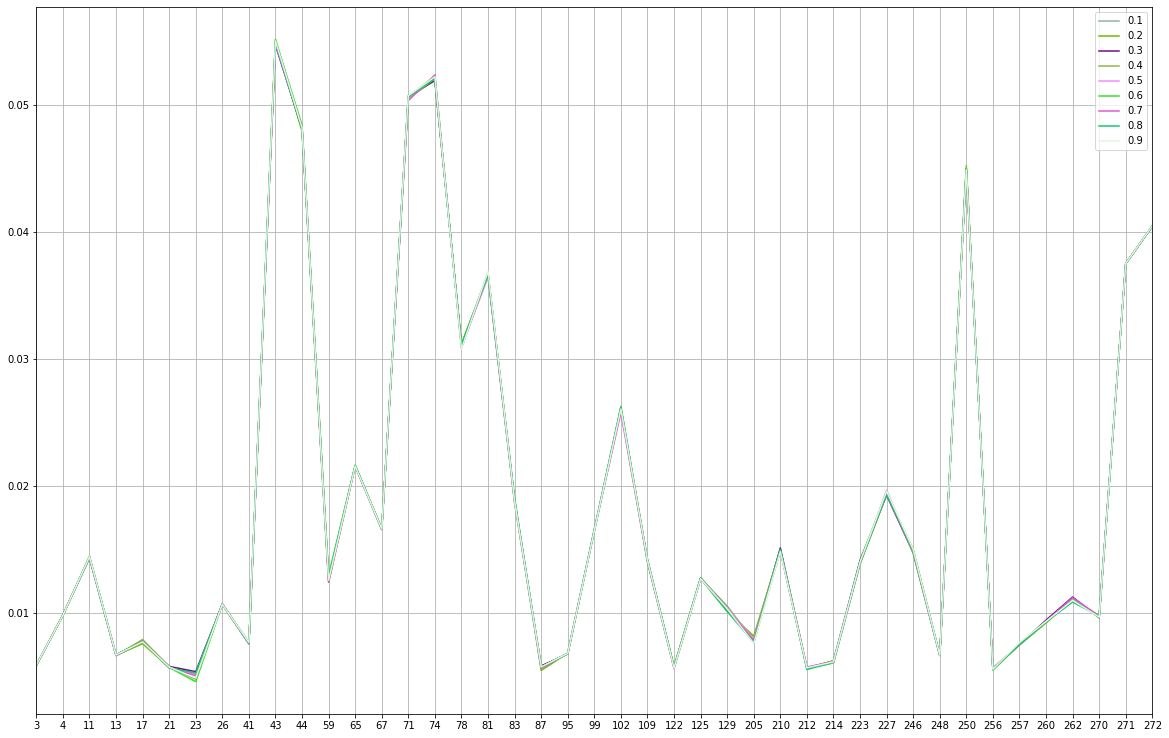

In [96]:
plt.figure(figsize=(20,13))
parallel_coordinates(df, 'beta', axvlines= False)
plt.show()